In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("./Data/train_clean.csv")
valid_df = pd.read_csv("./Data/valid_clean.csv")
test_df  = pd.read_csv("./Data/test_clean.csv")

In [3]:
X_train = train_df.drop(columns=["ID", "Label"])
y_train = train_df["Label"]

X_valid = valid_df.drop(columns=["ID", "Label"])
y_valid = valid_df["Label"]

X_test  = test_df.drop(columns=["ID", "Label"])
y_test  = test_df["Label"]

In [4]:
text_col = "Statement"
cat_cols = ["Party Affiliation", "Speaker Job Title", "State Info"]
num_cols = ["char_count", "word_count", "avg_word_length", "true_ratio", "false_ratio"]

In [5]:
text_transformer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

cat_transformer = OneHotEncoder(handle_unknown="ignore")

num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("text", text_transformer, text_col),
        ("cat", cat_transformer, cat_cols),
        ("num", num_transformer, num_cols)
    ]
)

In [6]:
model = Pipeline([
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(max_iter=200, class_weight="balanced"))
])

Validation Results:
              precision    recall  f1-score   support

 barely-true       0.26      0.22      0.24       237
       false       0.31      0.31      0.31       263
   half-true       0.43      0.41      0.42       248
 mostly-true       0.49      0.47      0.48       251
  pants-fire       0.28      0.36      0.32       116
        true       0.23      0.27      0.25       169

    accuracy                           0.34      1284
   macro avg       0.33      0.34      0.33      1284
weighted avg       0.35      0.34      0.34      1284

Validation Accuracy: 0.34190031152647976


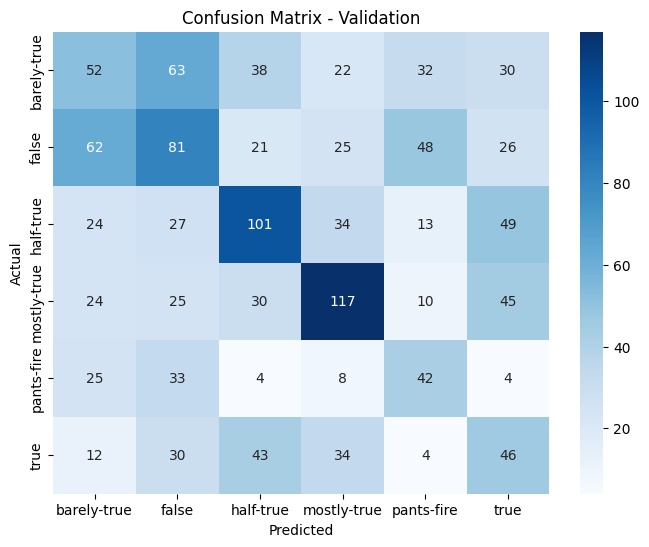

In [9]:
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

print("Validation Results:")
print(classification_report(y_valid, y_pred))
print("Validation Accuracy:", accuracy_score(y_valid, y_pred))


cm = confusion_matrix(y_valid, y_pred, labels=model.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Validation")
plt.show()

In [10]:
y_train_pred = model.predict(X_train)

print("Training Results:")
print(classification_report(y_train, y_train_pred))

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

Training Results:
              precision    recall  f1-score   support

 barely-true       0.67      0.65      0.66      1654
       false       0.72      0.60      0.65      1995
   half-true       0.73      0.64      0.68      2114
 mostly-true       0.69      0.73      0.71      1962
  pants-fire       0.55      0.89      0.68       839
        true       0.63      0.63      0.63      1676

    accuracy                           0.67     10240
   macro avg       0.67      0.69      0.67     10240
weighted avg       0.68      0.67      0.67     10240

Training Accuracy: 0.6712890625
